In [27]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [28]:
# Load Data
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [30]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:,-1] ,test_size=0.2, random_state=42)

In [31]:
#Basic Information about Dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Data Cleaning and Preprocessing:

In [32]:
# Check Missing Values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [33]:
# Detect outliers 
numerical_cols = ['age', 'bmi','HbA1c_level','blood_glucose_level']
def detect_outliers(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

outliers = detect_outliers(df, numerical_cols)

# Print outliers for each column
for col, out in outliers.items():
    print(f"Outliers detected in {col}:")
    print(out[['gender', col]])
    print("\n")


Outliers detected in age:
Empty DataFrame
Columns: [gender, age]
Index: []


Outliers detected in bmi:
       gender    bmi
11     Female  54.70
24     Female  13.99
39     Female  56.43
59     Female  63.48
93       Male  55.61
...       ...    ...
99933  Female  13.34
99948  Female  39.62
99953  Female  60.52
99960  Female  45.15
99993  Female  40.69

[7086 rows x 2 columns]


Outliers detected in HbA1c_level:
       gender  HbA1c_level
40       Male          9.0
55       Male          9.0
59     Female          8.8
135      Male          9.0
169    Female          9.0
...       ...          ...
99523  Female          8.8
99663    Male          9.0
99706    Male          9.0
99740    Male          9.0
99929  Female          8.8

[1315 rows x 2 columns]


Outliers detected in blood_glucose_level:
       gender  blood_glucose_level
38       Male                  260
94     Female                  300
104    Female                  280
125    Female                  280
142    Female   

In [34]:
#Remove Outliers by using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Column: {column}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Original count: {len(df)}, Filtered count: {len(filtered_df)}")
    return filtered_df
for col in  ['age', 'bmi','HbA1c_level','blood_glucose_level']:
    df = remove_outliers(df, col)
    print(f"Data shape after removing outliers in {col}: {df.shape}")

print("Final DataFrame shape:", df.shape)

Column: age
Lower bound: -30.0, Upper bound: 114.0
Original count: 100000, Filtered count: 100000
Data shape after removing outliers in age: (100000, 9)
Column: bmi
Lower bound: 14.705, Upper bound: 38.504999999999995
Original count: 100000, Filtered count: 92914
Data shape after removing outliers in bmi: (92914, 9)
Column: HbA1c_level
Lower bound: 2.6999999999999993, Upper bound: 8.3
Original count: 92914, Filtered count: 91804
Data shape after removing outliers in HbA1c_level: (91804, 9)
Column: blood_glucose_level
Lower bound: 11.5, Upper bound: 247.5
Original count: 91804, Filtered count: 90387
Data shape after removing outliers in blood_glucose_level: (90387, 9)
Final DataFrame shape: (90387, 9)


In [35]:
# Feature engineering: Create dummy variables for 'smoking_history'
from sklearn.preprocessing import StandardScaler
data = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
    data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
data


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,1.710746,0,1,-0.231137,1.149580,0.154198,0,0,0,0,1,0
1,Female,0.558196,0,0,0.205441,1.149580,-1.550459,0,0,0,0,0,0
2,Male,-0.594353,0,0,0.205441,0.244933,0.665596,0,0,0,0,1,0
3,Female,-0.239722,0,0,-0.587779,-0.458682,0.580363,0,1,0,0,0,0
4,Male,1.533431,1,1,-1.266217,-0.659715,0.580363,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,1.710746,0,0,0.205441,0.747515,-1.266349,0,0,0,0,0,0
99996,Female,-1.746903,0,0,-1.833973,1.049064,-0.982240,0,0,0,0,0,0
99997,Male,1.090142,0,0,0.309973,0.244933,0.580363,0,0,0,1,0,0
99998,Female,-0.771668,0,0,1.865667,-1.463846,-0.982240,0,0,0,0,1,0


Exploratory Data Analysis (EDA):

In [36]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'gender' column
data['gender'] = label_encoder.fit_transform(data['gender'])

 Measures of Central Tendency (Mean and Median)

In [37]:
# Calculate Mean
mean_values = data.mean()
print("Mean:\n", mean_values)

#Calculate Median
median_values = data.median()
print("Median:\n", median_values)


Mean:
 gender                         4.189541e-01
age                           -1.493612e-17
hypertension                   6.565103e-02
heart_disease                  3.562459e-02
bmi                           -1.973140e-16
HbA1c_level                   -4.399081e-16
blood_glucose_level           -3.789451e-16
diabetes                       4.973060e-02
smoking_history_current        9.200438e-02
smoking_history_ever           3.918705e-02
smoking_history_former         8.922743e-02
smoking_history_never          3.478487e-01
smoking_history_not current    6.375917e-02
dtype: float64
Median:
 gender                         0.000000
age                            0.026251
hypertension                   0.000000
heart_disease                  0.000000
bmi                            0.205441
HbA1c_level                    0.345449
blood_glucose_level            0.154198
diabetes                       0.000000
smoking_history_current        0.000000
smoking_history_ever           0.0000

Dispersion (variance, standard deviation).

In [38]:
# Calculate Variance
variance_values = data.var()
print("Variance:\n", variance_values)

# Calculate Standard Deviation
std_dev_values = data.std()
print("Standard Deviation:\n", std_dev_values)

Variance:
 gender                         0.243810
age                            1.000011
hypertension                   0.061342
heart_disease                  0.034356
bmi                            1.000011
HbA1c_level                    1.000011
blood_glucose_level            1.000011
diabetes                       0.047258
smoking_history_current        0.083540
smoking_history_ever           0.037652
smoking_history_former         0.081267
smoking_history_never          0.226852
smoking_history_not current    0.059695
dtype: float64
Standard Deviation:
 gender                         0.493772
age                            1.000006
hypertension                   0.247672
heart_disease                  0.185353
bmi                            1.000006
HbA1c_level                    1.000006
blood_glucose_level            1.000006
diabetes                       0.217389
smoking_history_current        0.289034
smoking_history_ever           0.194041
smoking_history_former         0.

Correlation Analysis

In [39]:
# Correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                                gender       age  hypertension  heart_disease  \
gender                       1.000000 -0.033002      0.016549       0.078209   
age                         -0.033002  1.000000      0.248875       0.229139   
hypertension                 0.016549  0.248875      1.000000       0.122334   
heart_disease                0.078209  0.229139      0.122334       1.000000   
bmi                          0.021201  0.387896      0.130185       0.065943   
HbA1c_level                  0.014384  0.051066      0.042291       0.036012   
blood_glucose_level          0.008798  0.047223      0.037560       0.028428   
diabetes                     0.035951  0.207985      0.161286       0.145763   
smoking_history_current      0.025813  0.032913      0.020717       0.005523   
smoking_history_ever         0.009245  0.065956      0.024509       0.038088   
smoking_history_former       0.046620  0.215260      0.081409       0.092901   
smoking_history_nev

Grouping and Aggregation

In [40]:
#Group data by a specific variable and perform aggregation.
# Group by gender and calculate mean values
grouped_by_gender = data.groupby('gender').mean()
print("Grouped by Gender:\n", grouped_by_gender)

# Group by smoking column and calculate mean values
grouped_by_smoking = data.groupby('smoking_history_former').mean()
print("Grouped by Smoking History:\n", grouped_by_smoking)


Grouped by Gender:
              age  hypertension  heart_disease       bmi  HbA1c_level  \
gender                                                                 
0       0.027882      0.062148       0.023298 -0.017888    -0.012228   
1      -0.038504      0.070545       0.052757  0.024669     0.016992   
2      -0.474404      0.000000       0.000000  0.377853    -0.027053   

        blood_glucose_level  diabetes  smoking_history_current  \
gender                                                           
0                 -0.007429  0.043075                 0.085637   
1                  0.010254  0.058995                 0.100888   
2                  0.137486  0.000000                 0.000000   

        smoking_history_ever  smoking_history_former  smoking_history_never  \
gender                                                                        
0                   0.037669                0.077908               0.386916   
1                   0.041286                0.10498

Extract meaningful insightsfrom the data through descriptive statistics.

In [41]:
# Summary statistics for diabetes
diabetes_summary = data[data['diabetes'] == 1].describe()
print("Diabetes Summary Statistics:\n", diabetes_summary)

# Summary statistics for non-diabetes
non_diabetes_summary = data[data['diabetes'] == 0].describe()
print("Non-Diabetes Summary Statistics:\n", non_diabetes_summary)

# Insights
# For example, comparing the average BMI of diabetic vs non-diabetic individuals
avg_bmi_diabetes = data[data['diabetes'] == 1]['bmi'].mean()
avg_bmi_non_diabetes = data[data['diabetes'] == 0]['bmi'].mean()
print(f"Average BMI - Diabetes: {avg_bmi_diabetes}")
print(f"Average BMI - Non-Diabetes: {avg_bmi_non_diabetes}")


Diabetes Summary Statistics:
             gender          age  hypertension  heart_disease          bmi  \
count  4495.000000  4495.000000   4495.000000    4495.000000  4495.000000   
mean      0.496552     0.909168      0.240267       0.153726     0.612911   
std       0.500044     0.657577      0.427293       0.360726     0.890061   
min       0.000000    -1.702574      0.000000       0.000000    -2.241856   
25%       0.000000     0.558196      0.000000       0.000000     0.205441   
50%       0.000000     1.001485      0.000000       0.000000     0.359165   
75%       1.000000     1.444773      0.000000       0.000000     1.281513   
max       1.000000     1.710746      1.000000       1.000000     2.496963   

       HbA1c_level  blood_glucose_level  diabetes  smoking_history_current  \
count  4495.000000          4495.000000    4495.0              4495.000000   
mean      1.128627             0.928746       1.0                 0.108120   
std       0.738544             1.052367   

Data Visualization:

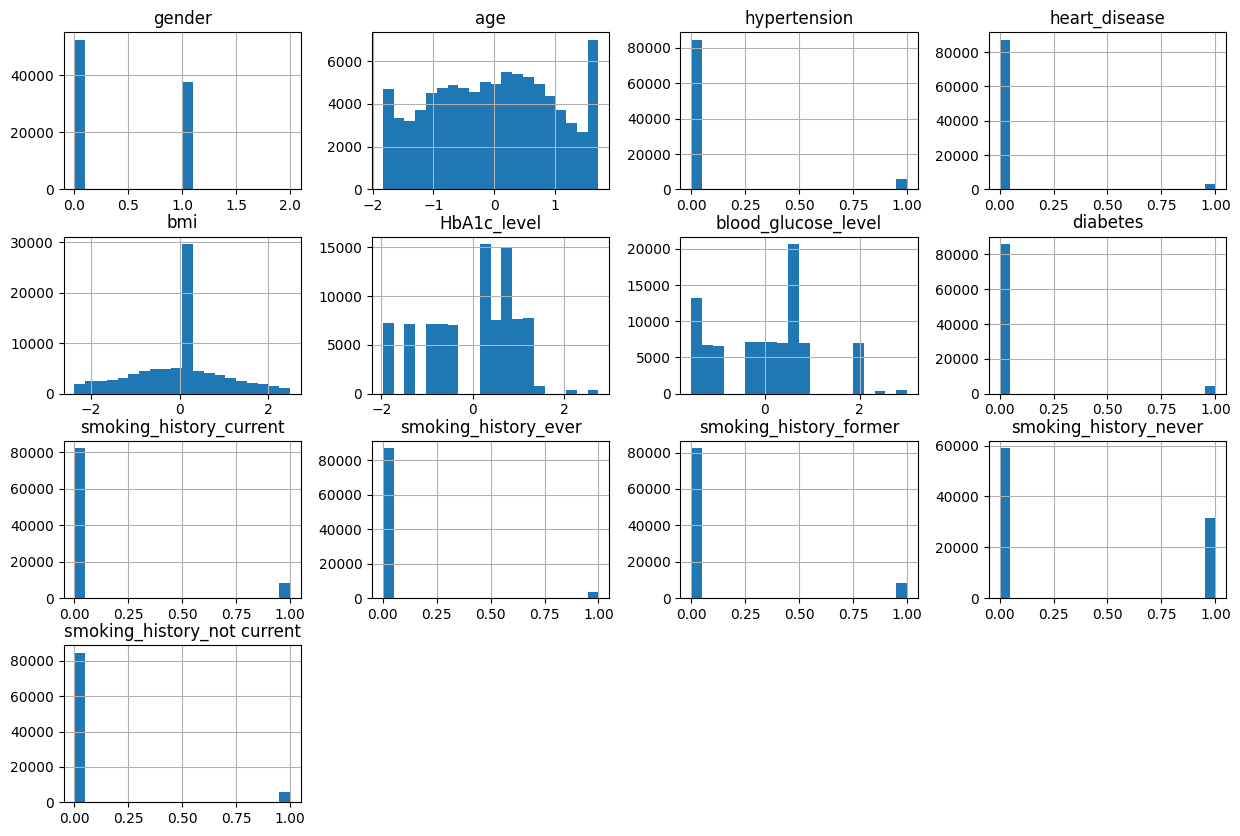

In [42]:
# Histograms for numeric variables
data.hist(bins=20, figsize=(15, 10))
plt.show()

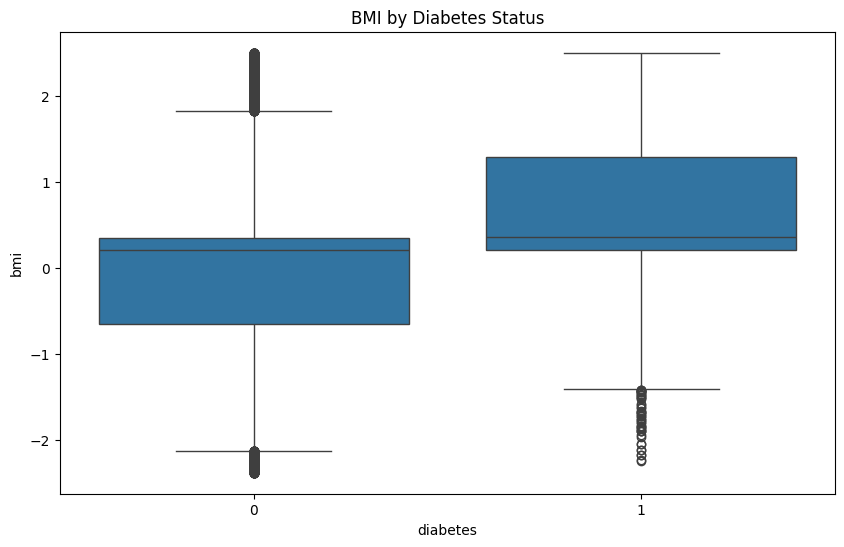

In [43]:
# Box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='diabetes', y='bmi')
plt.title('BMI by Diabetes Status')
plt.show()

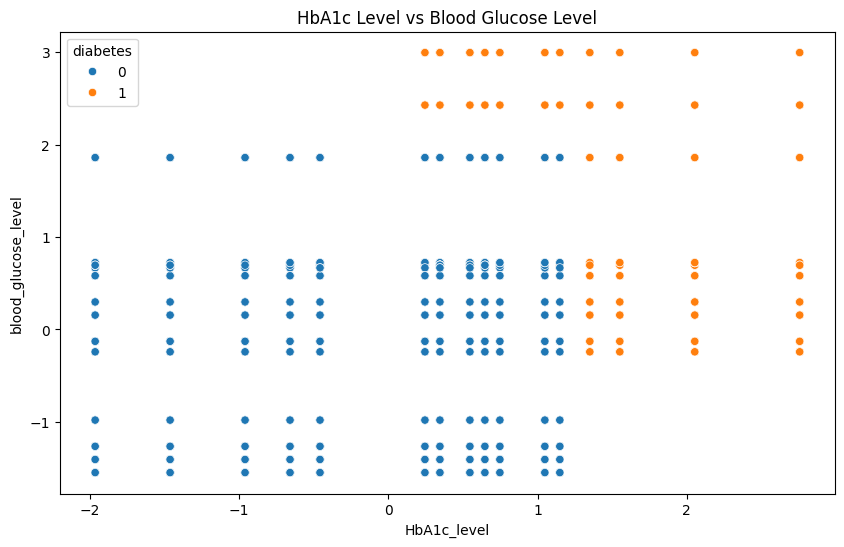

In [44]:
# Scatter plot for HbA1c level vs Blood Glucose Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='HbA1c_level', y='blood_glucose_level', hue='diabetes')
plt.title('HbA1c Level vs Blood Glucose Level')
plt.show()

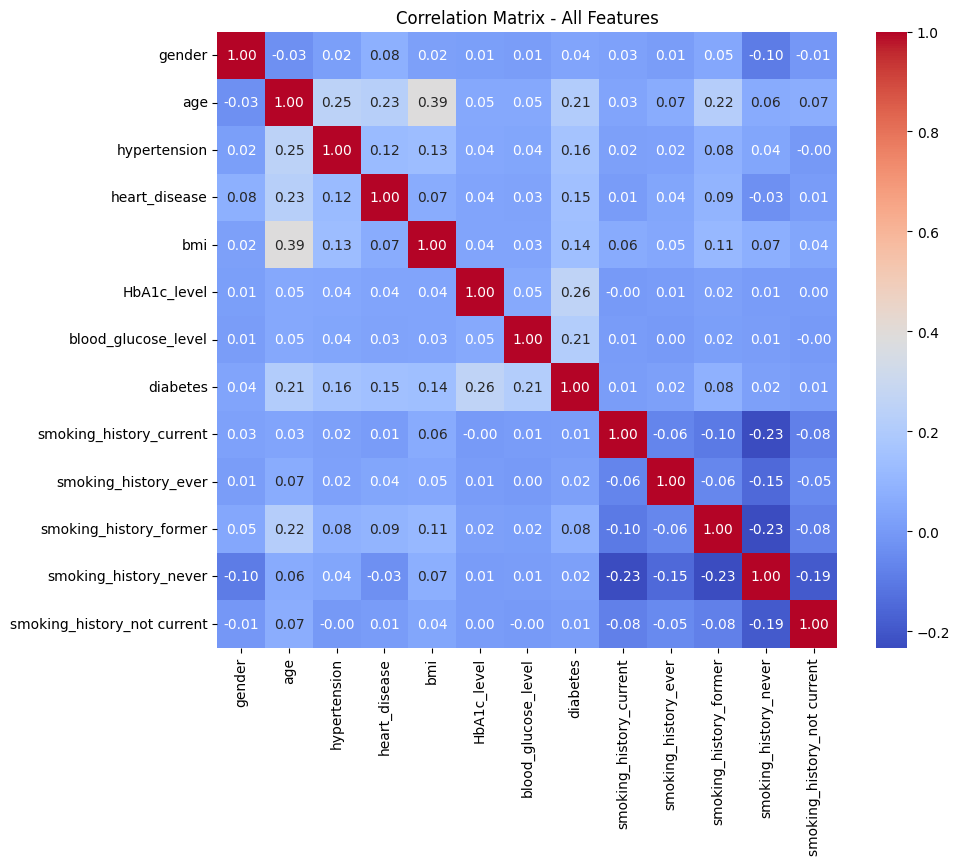

In [45]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Correlation heatmap for all features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - All Features')
plt.show()


Hypothesis Testing:


In [46]:
from scipy.stats import ttest_ind, chi2_contingency

# Hypothesis 1: t-test for BMI difference between diabetic and non-diabetic individuals
t_statistic, p_value_bmi = ttest_ind(data[data['diabetes'] == 1]['bmi'], data[data['diabetes'] == 0]['bmi'])
print("Hypothesis 1 - BMI Difference:")
print("T-statistic:", t_statistic)
print("P-value:", p_value_bmi)            

# Hypothesis 2: Chi-square test for smoking history and diabetes status
# Convert smoking_history to categorical variable for chi-square test
data['smoking_history_former'] = data['smoking_history_former'].astype('category')
# Contingency table for smoking history and diabetes
contingency_table = pd.crosstab(data['smoking_history_former'], data['diabetes'])
chi2_stat, p_value_smoking_diabetes, dof, expected = chi2_contingency(contingency_table)
print("\nHypothesis 2 - Smoking History and Diabetes Association:")
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p_value_smoking_diabetes)  



Hypothesis 1 - BMI Difference:
T-statistic: 42.574121000396374
P-value: 0.0

Hypothesis 2 - Smoking History and Diabetes Association:
Chi-square Statistic: 632.1076756800874
P-value: 1.7394918961137935e-139


In [ ]:
# Results :
#For Hypothesis 1, if the p-value is less than the significance level (usually 0.05), we reject the null hypothesis, suggesting that there is a significant difference in average BMI between diabetic and non-diabetic individuals.
#For Hypothesis 2, if the p-value is less than the significance level, we reject the null hypothesis, indicating that smoking history and diabetes status are associated.

Advanced Analysis:

• Apply at-least two machine learning techniques relevant to the dataset.

• Validatemodel performance and interpret results.

In [49]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Gender' is the column containing 'Male', 'Female', etc.
# Replace 'Gender' with the actual column name if it's different.
label_encoder = LabelEncoder()
X_train['gender'] = label_encoder.fit_transform(X_train['gender'])
X_test['gender'] = label_encoder.transform(X_test['gender'])



X_train['smoking_history'] = label_encoder.fit_transform(X_train['smoking_history'])
X_test['smoking_history'] = label_encoder.transform(X_test['smoking_history'])


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier Accuracy:", accuracy_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Random Forest Classifier Accuracy: 0.97065

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[18232    60]
 [  527  1181]]


In [51]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Model Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Classifier Accuracy:", accuracy_dt)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))



Decision Tree Classifier Accuracy: 0.95245

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000


Confusion Matrix:
[[17788   504]
 [  447  1261]]


In [52]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_classifier.predict(X_test)

# Model Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Classifier Accuracy:", accuracy_nb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))



Naive Bayes Classifier Accuracy: 0.90475

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18292
           1       0.46      0.64      0.53      1708

    accuracy                           0.90     20000
   macro avg       0.71      0.78      0.74     20000
weighted avg       0.92      0.90      0.91     20000


Confusion Matrix:
[[17005  1287]
 [  618  1090]]


In [53]:
from sklearn.linear_model import LogisticRegression


# Logistic Regression model
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_classifier.predict(X_test)

# Model Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Classifier Accuracy:", accuracy_lr)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))



Logistic Regression Classifier Accuracy: 0.95885

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix:
[[18128   164]
 [  659  1049]]


In [54]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_classifier.predict(X_test)

# Model Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nKNN Classifier Accuracy:", accuracy_knn)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))




KNN Classifier Accuracy: 0.95245

Confusion Matrix:
[[18160   132]
 [  819   889]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.87      0.52      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.91      0.76      0.81     20000
weighted avg       0.95      0.95      0.95     20000

